# IBM HR Attrition: Objective & Project

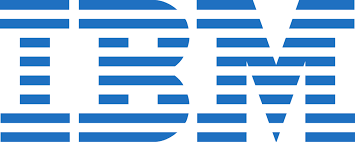

**What is the objective of this project?** </br>
The objective for this project is to:
* see if we can predict an employees income based off of other factors in our data

**How will the solution be used?** </br>
To get a better sense of the dataset and to generalize this data to many similar use cases.

**How should the problem be framed?** </br>
We should use a classification algorithm as we are looking to predict whether a given employee will attrite.

## Initialize Packages

In [323]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Initial Look at the Data

Load data and check out a few rows.

In [324]:
df = pd.read_csv("/Users/blakenicholson/Documents/Personal/Coding/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df[0:4].T

,0,1,2,3
Age,41,49,37,33
Attrition,Yes,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently
DailyRate,1102,279,1373,1392
Department,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3
Education,2,1,2,4
EducationField,Life Sciences,Life Sciences,Other,Life Sciences
EmployeeCount,1,1,1,1
EmployeeNumber,1,2,4,5


In [325]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### *From the data dictionary:*
</br>
This is a fictional data set created by IBM data scientists.

http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

#### Education</br>
* 1 'Below College'
* 2 'College'
* 3 'Bachelor'
* 4 'Master'
* 5 'Doctor'

#### EnvironmentSatisfaction</br>
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'

#### JobInvolvement</br>
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'

#### JobSatisfaction</br>
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'

#### PerformanceRating</br>
* 1 'Low'
* 2 'Good'
* 3 'Excellent'
* 4 'Outstanding'

#### RelationshipSatisfaction</br>
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'

### WorkLifeBalance</br>
* 1 'Bad'
* 2 'Good'
* 3 'Better'
* 4 'Best'

# Data Cleaning

In [326]:
def Educa_numttocat(number):
    if number is 1:
        return 'Below College'
    elif number is 2:
        return 'College'
    elif number is 3:
        return 'Bachelor'
    elif number is 4:
        return 'Master'
    elif number is 5:
        return 'Doctor'

In [327]:
def numttocat(number):
    if number is 1:
        return 'Low'
    elif number is 2:
        return 'Medium'
    elif number is 3:
        return 'High'
    elif number is 4:
        return 'Very High'
    

In [328]:
def PR_numttocat(number):
    if number is 1:
        return 'Low'
    elif number is 2:
        return 'Good'
    elif number is 3:
        return 'Excellent'
    elif number is 4:
        return 'Outstanding'

In [329]:
def wb_numttocat(number):
    if number is 1:
        return 'Bad'
    elif number is 2:
        return 'Good'
    elif number is 3:
        return 'Better'
    elif number is 4:
        return 'Best'

In [330]:
df["Education"] = df["Education"].map(Educa_numttocat)
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].map(numttocat)
df["JobInvolvement"] = df["JobInvolvement"].map(numttocat)
df["JobSatisfaction"] = df["JobSatisfaction"].map(numttocat)
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].map(numttocat)
df["PerformanceRating"] = df["PerformanceRating"].map(PR_numttocat)
df["WorkLifeBalance"] = df["WorkLifeBalance"].map(PR_numttocat)

Let's also check out the shape of our DataFrame 

In [331]:
df.shape

(1470, 35)

Let's check out the format of each column and the counts.

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

Nice - it doesn't look like there are any NULL values.

# Exploratory Data Analysis

Following this guide: 
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

In [333]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Excellent,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Excellent,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Excellent,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Excellent,2,2,2,2


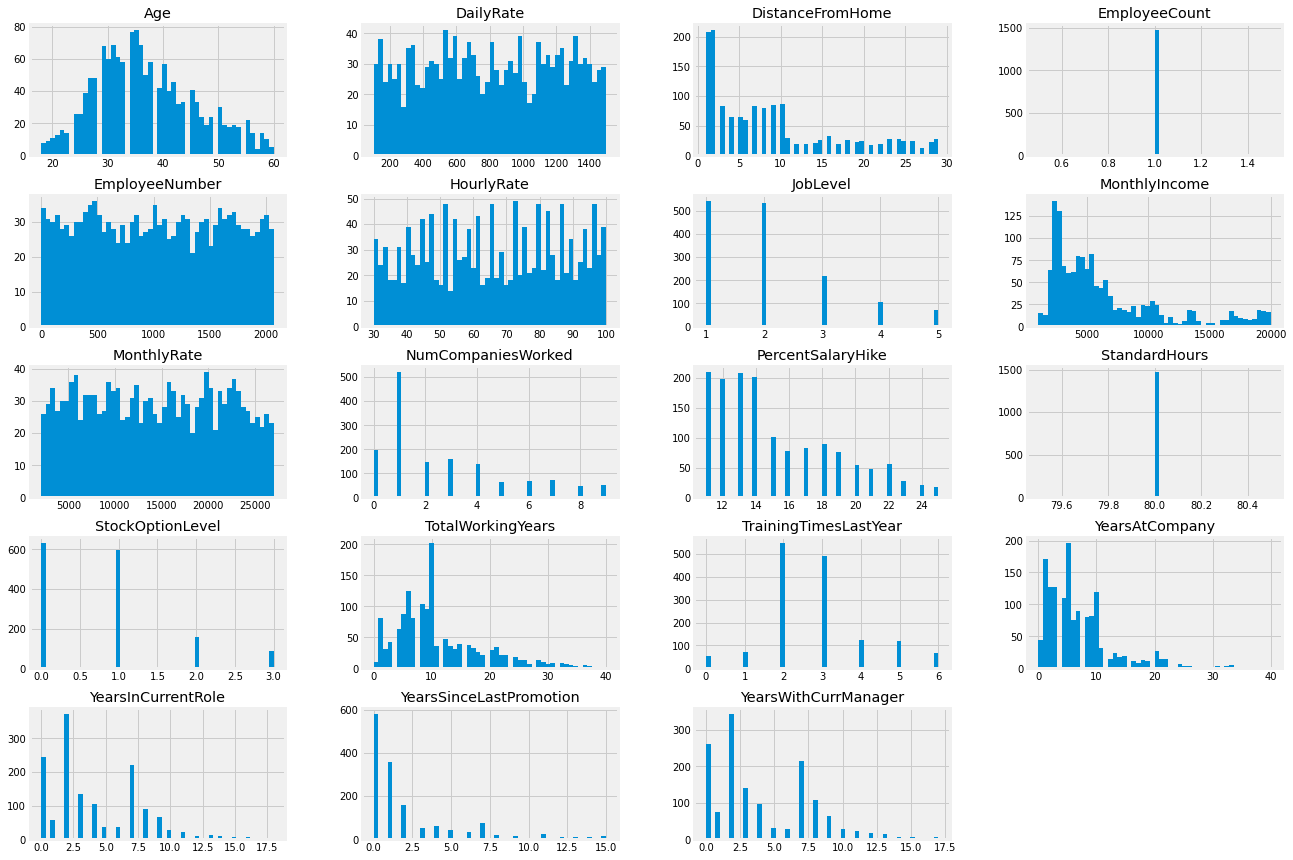

In [334]:
df.hist(bins=50, figsize=(20,15))
plt.show()

It looks like Age, YearsAtCompany, TotalWorkingYears are all somewhat normally distributed.

In [433]:
attributes = list(df.drop(['Attrition','EmployeeNumber','MonthlyRate','StockOptionLevel','DailyRate'],axis=1).columns)

/Users/blakenicholson/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/blakenicholson/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/blakenicholson/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/blakenicholson/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.

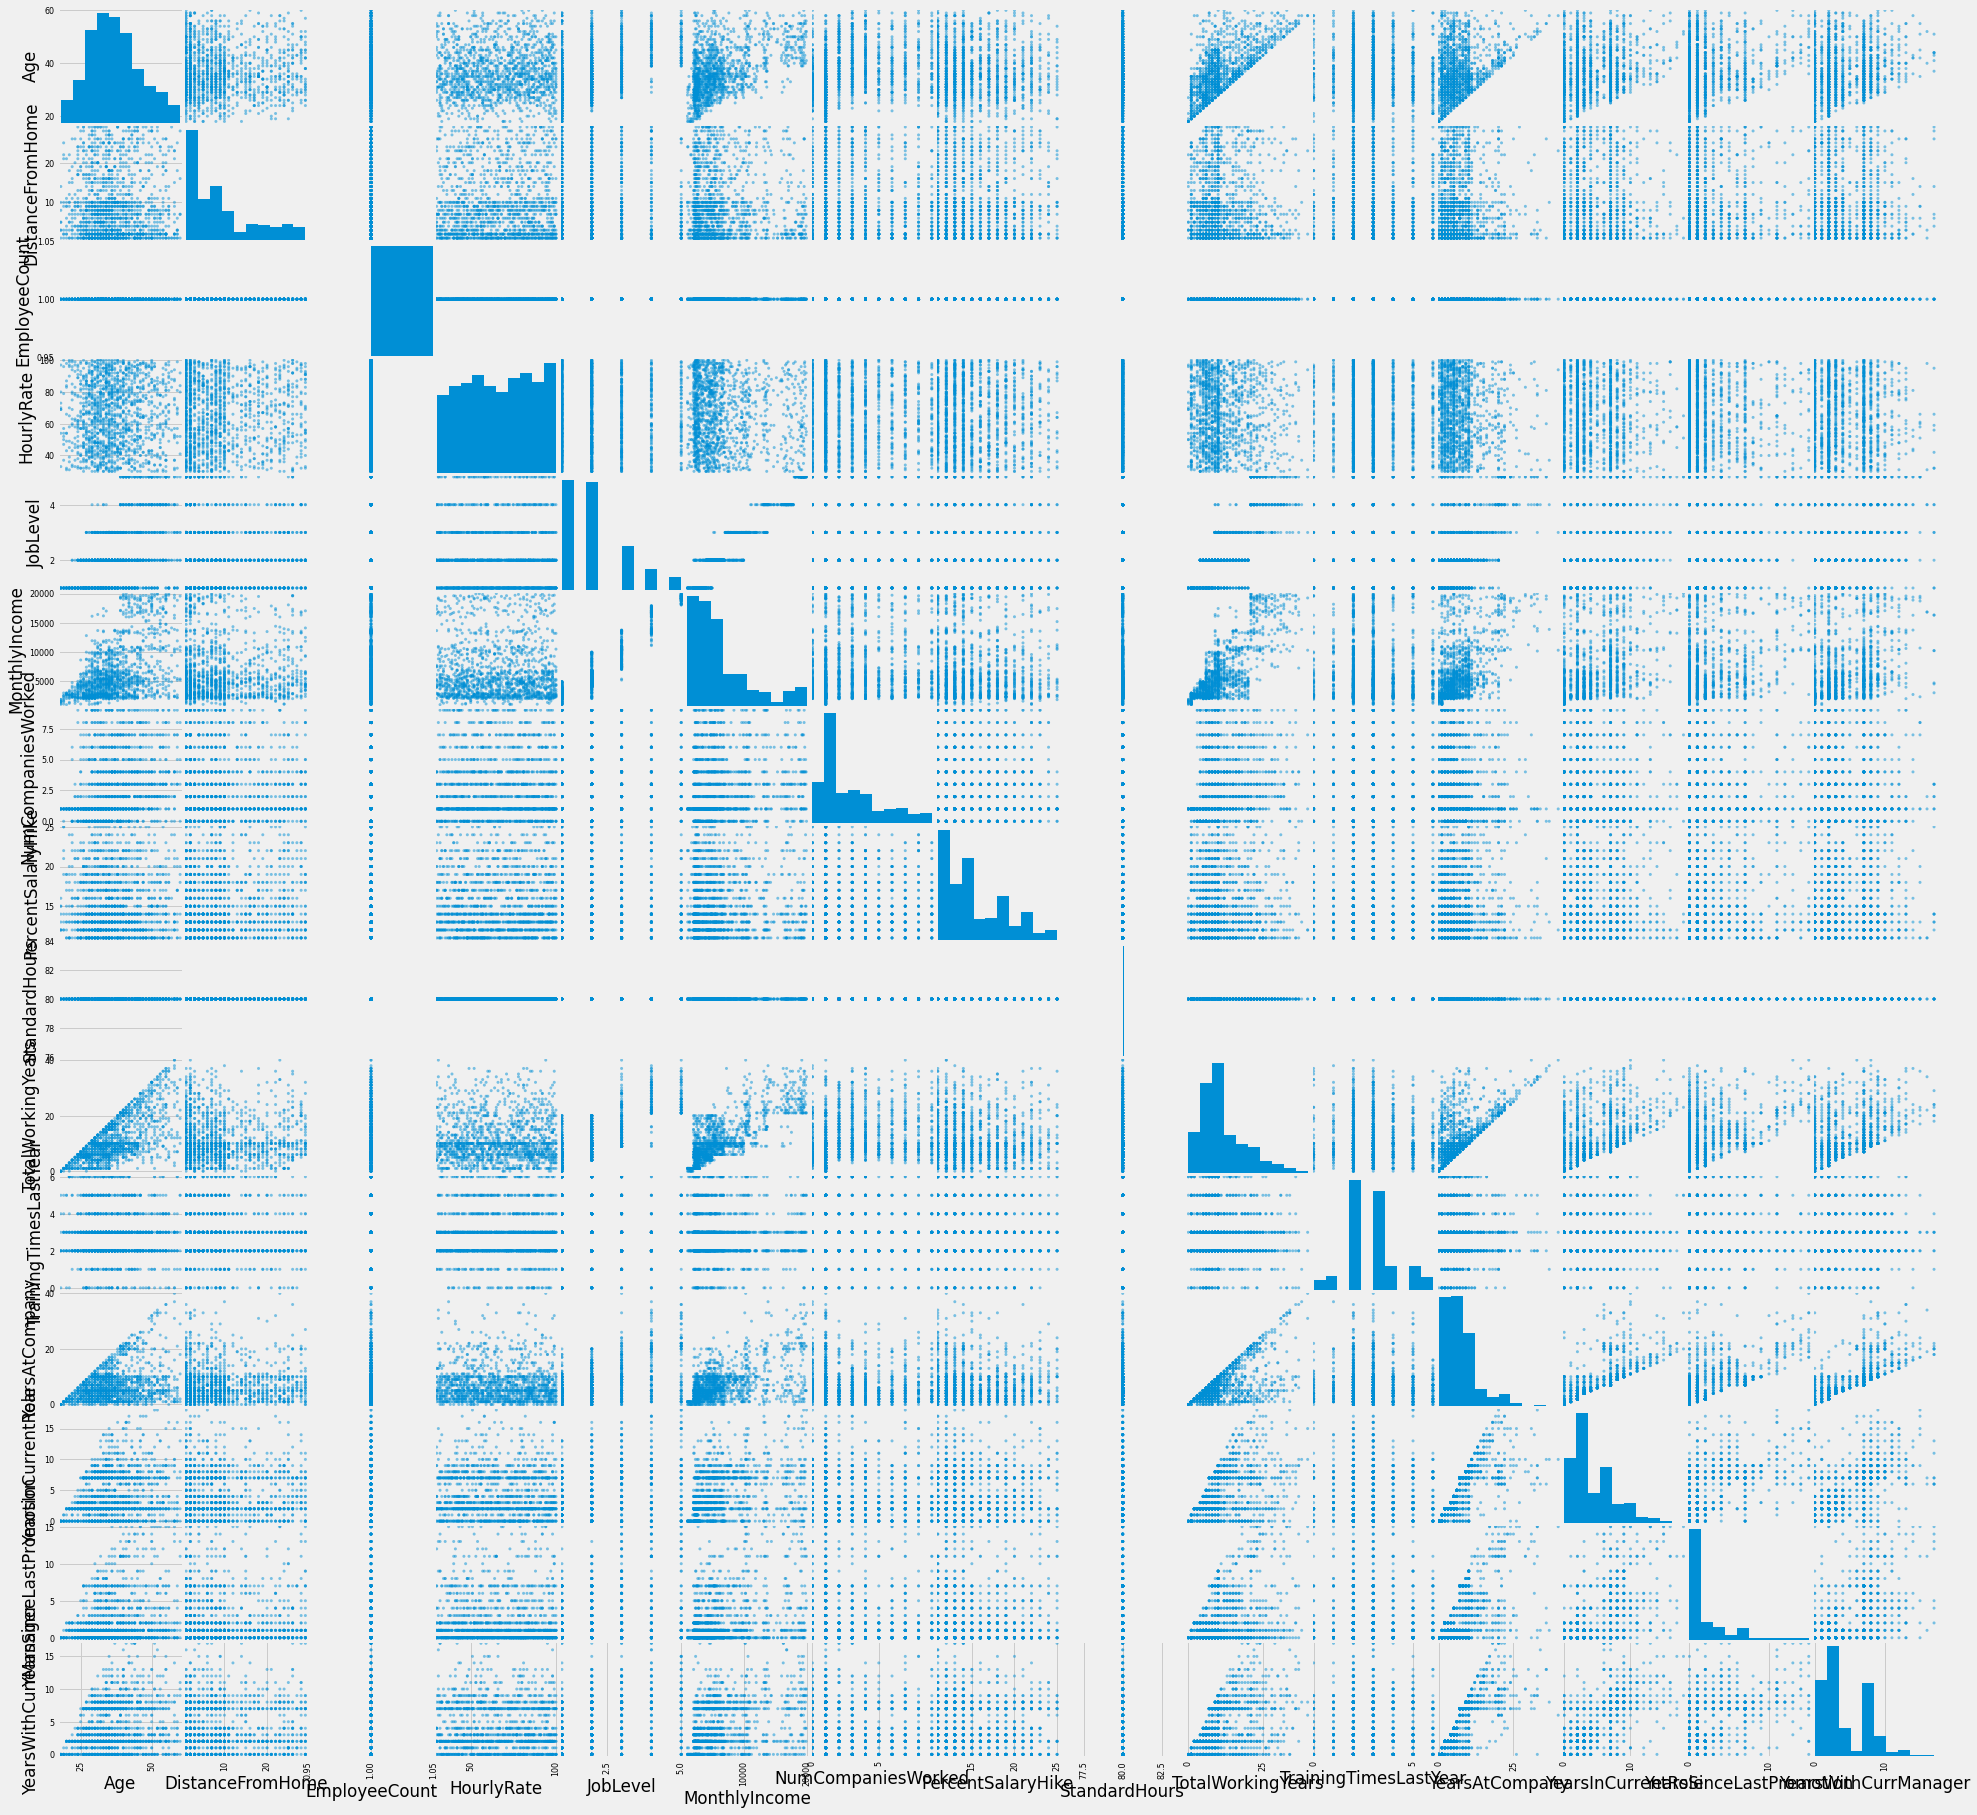

In [435]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes],figsize=(30,30))
plt.show()

## Univariate Analysis

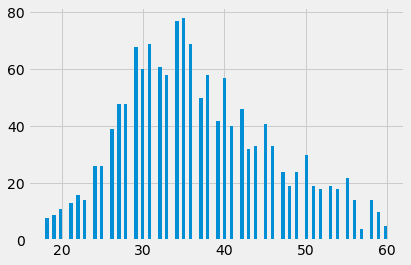

In [436]:
plt.hist(df["Age"],bins=100)
plt.show()

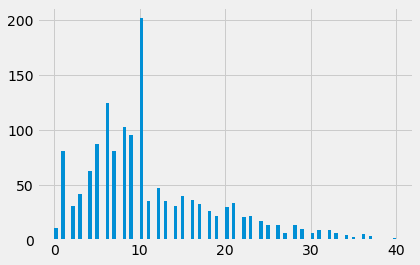

In [437]:
plt.hist(df["TotalWorkingYears"],bins=100)
plt.show()

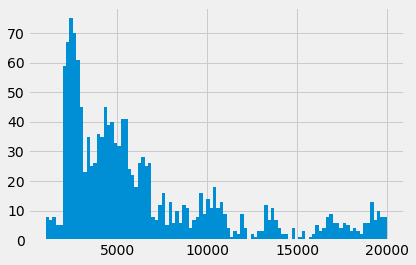

In [438]:
plt.hist(df["MonthlyIncome"],bins=100)
plt.show()

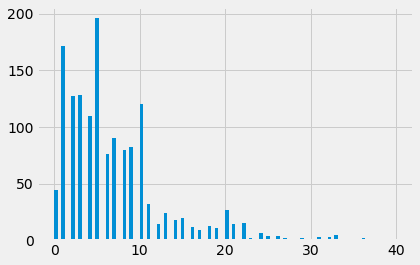

In [439]:
plt.hist(df["YearsAtCompany"],bins=100)
plt.show()

<Figure size 720x432 with 0 Axes>

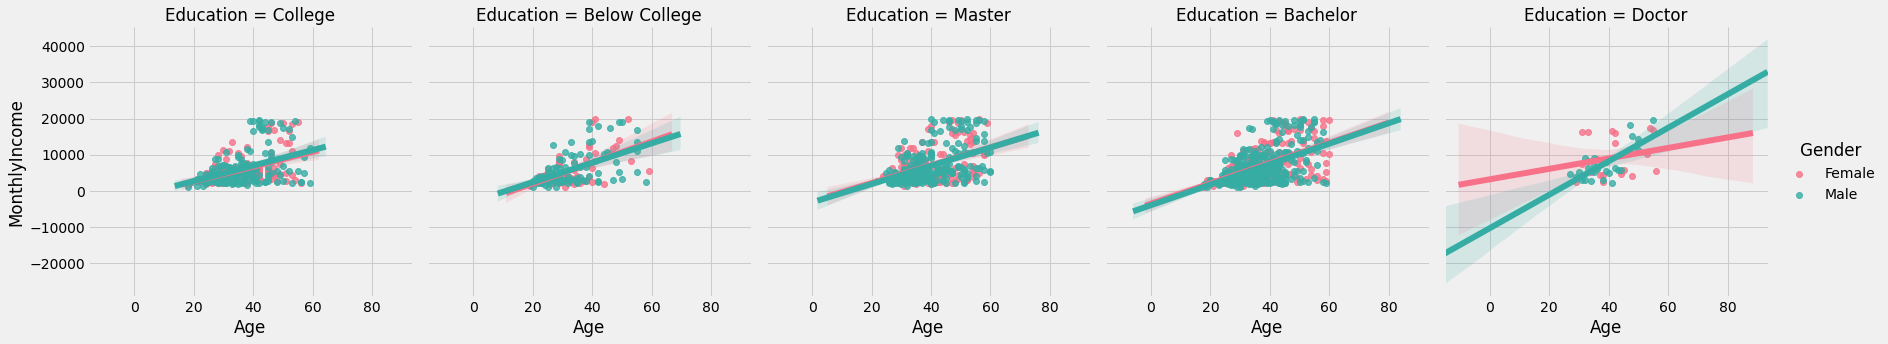

In [440]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='MonthlyIncome',x='Age', hue='Gender' ,palette="husl", col="Education")

plt.show()

<Figure size 720x432 with 0 Axes>

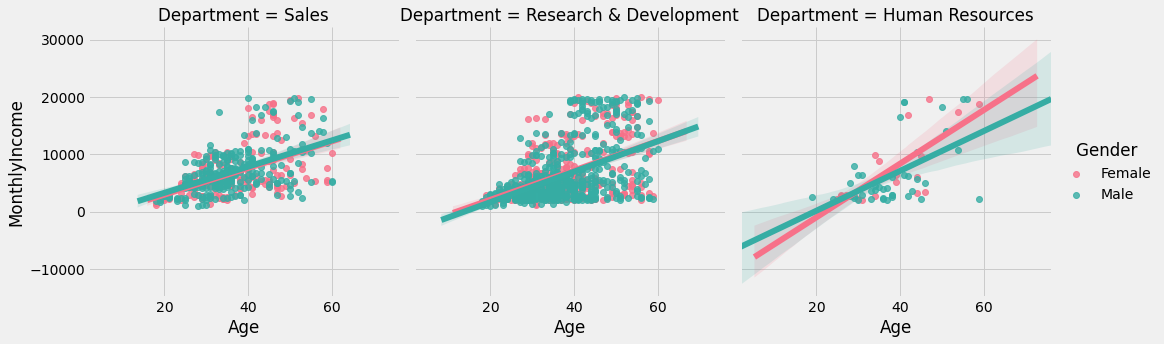

In [441]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='MonthlyIncome',x='Age', hue='Gender' ,palette="husl", col="Department")

plt.show()

In [442]:
screening_df = df.copy()

Let's now look at the correlations between each column. Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

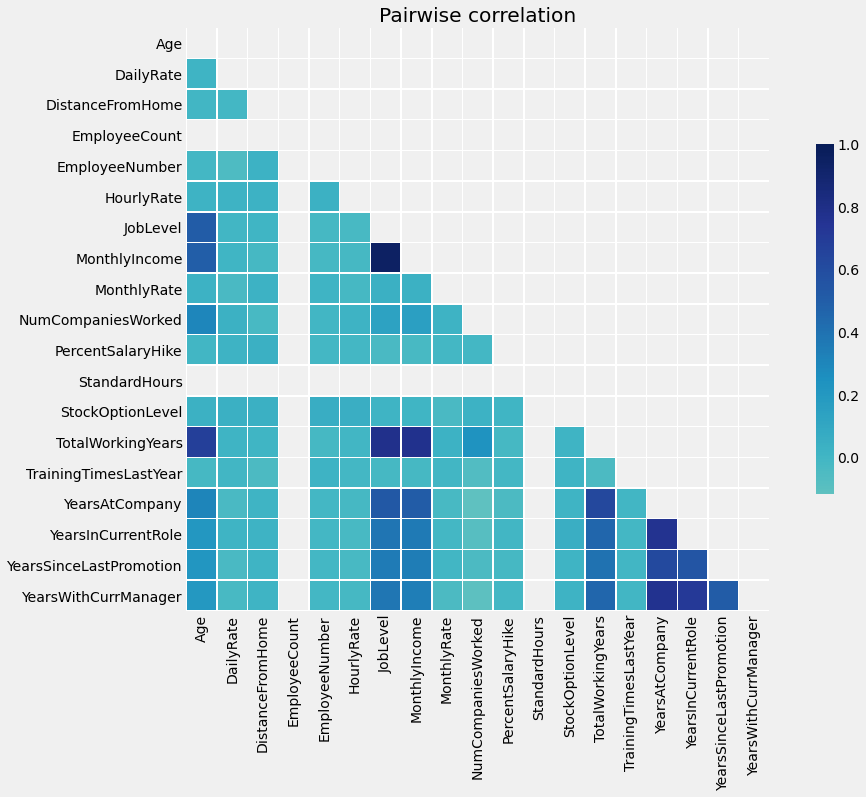

In [443]:
corr = screening_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

In [444]:
corr["MonthlyIncome"].sort_values(ascending=False)

MonthlyIncome              1.000000
JobLevel                   0.950300
TotalWorkingYears          0.772893
YearsAtCompany             0.514285
Age                        0.497855
YearsInCurrentRole         0.363818
YearsSinceLastPromotion    0.344978
YearsWithCurrManager       0.344079
NumCompaniesWorked         0.149515
MonthlyRate                0.034814
DailyRate                  0.007707
StockOptionLevel           0.005408
EmployeeNumber            -0.014829
HourlyRate                -0.015794
DistanceFromHome          -0.017014
TrainingTimesLastYear     -0.021736
PercentSalaryHike         -0.027269
EmployeeCount                   NaN
StandardHours                   NaN
Name: MonthlyIncome, dtype: float64

It looks like Job Level, Total Working Years, YearsAtCompany, Age, and YearsInCurrentRole are *fairly* correlated with MonthlyIncome.

In [445]:
# sns.set_theme(style="ticks")
# survival_pal = {0: "r", 1:"g"}
# screening_df = df.copy()

# g = sns.pairplot(screening_df, hue="Survived", palette = survival_pal,height=2, aspect=1)
# g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Initial pair plot');

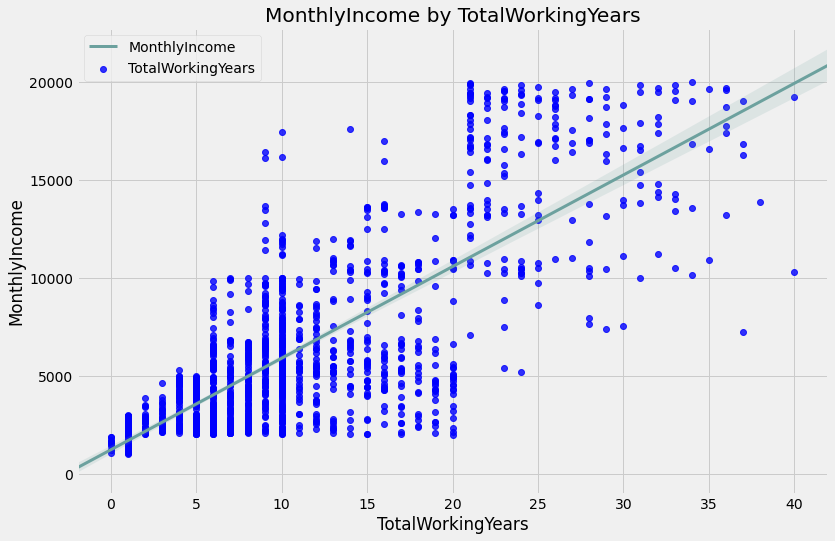

In [446]:
plt.figure(figsize=(12,8))
sns.regplot(df.TotalWorkingYears , df.MonthlyIncome, 
            scatter_kws={"color":"blue"}, 
            line_kws={"linewidth":3, "color": "#6ca19e" ,"label":"MonthlyIncome"},
            label="TotalWorkingYears")
plt.style.use("fivethirtyeight")
plt.title("MonthlyIncome by TotalWorkingYears")
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

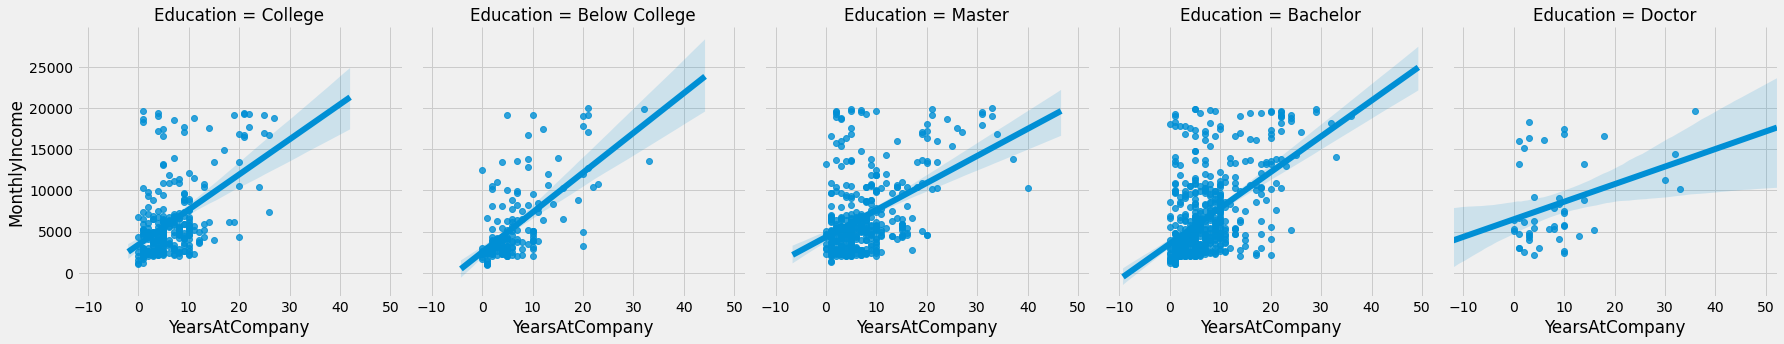

In [346]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='MonthlyIncome',x='YearsAtCompany', col='Education')

plt.show()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Education'>

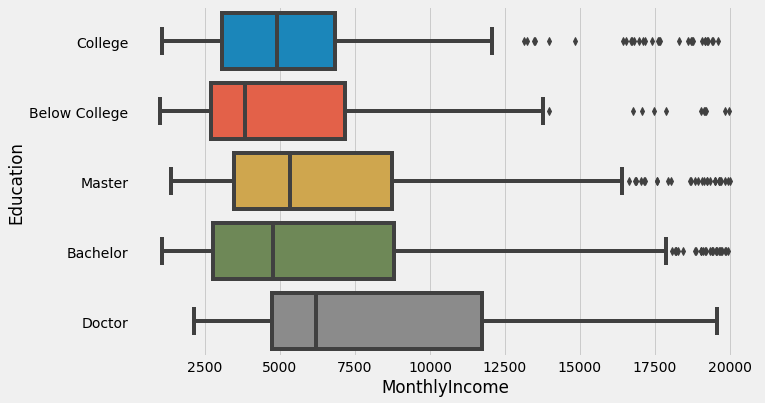

In [347]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df.Education, x=df.MonthlyIncome)

The mean income looks to be just below 5000 a month. However there are a lot of outliers in past 150,000

There are two strange boxes in the 2nd and 3rd Quadrant.

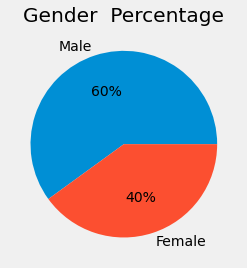

In [348]:
vals = [df.Gender[df.Gender=='Male'].count() , df.Gender[df.Gender=='Female'].count()]
label = ["Male" , "Female"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' );
plt.title("Gender  Percentage");

In [349]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Identify Dependent and Independent Variables

Create **X** and **y** dataframes

In [350]:
X = df.drop('MonthlyIncome', axis = 1)
y = df.loc[:,'MonthlyIncome']

In [351]:
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Excellent,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Excellent,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Excellent,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Excellent,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,...,High,80,1,17,3,Excellent,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,...,Low,80,1,9,5,Excellent,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,...,Medium,80,1,6,0,Excellent,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,...,Very High,80,0,17,3,Good,9,6,0,8


In [352]:
y

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

# Prepare the data for Machine Learning algorithms

In [353]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Create encoding for categorical variables

In [354]:
from sklearn import preprocessing

In [355]:
from sklearn.preprocessing import LabelEncoder

cat_features = X.columns[X.dtypes == object]
# Label Encoding
for f in cat_features:
    lbl = LabelEncoder()
    lbl.fit(list(X[f].values))
    X[f] = lbl.transform(list(X[f].values))

In [356]:
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,2,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,3,80,1,10,3,0,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,0,80,0,8,3,0,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,3,80,1,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,0,80,1,17,3,0,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,0,7,7,1,7
1467,27,0,2,155,1,4,0,1,1,2064,...,2,80,1,6,0,0,6,2,0,3
1468,49,0,1,1023,2,2,0,3,1,2065,...,3,80,0,17,3,1,9,6,0,8


"Dummy variable trap". Drop one of the variable columns to avoid collinearity.

# Splitting Training / Test Data

In [357]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from scipy.misc import comb

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

# Select and train a model

In [359]:
X_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
199,38,0,2,1084,1,29,0,5,1,273,...,1,80,1,9,3,2,7,7,1,7
390,43,0,2,982,1,12,0,1,1,520,...,0,80,1,25,3,0,25,10,3,9
108,25,0,2,1280,1,7,1,3,1,143,...,0,80,2,2,2,0,2,2,2,1
790,33,0,2,654,1,5,0,1,1,1099,...,0,80,1,9,2,0,3,2,1,2
663,21,1,2,1427,1,18,1,4,1,923,...,1,80,0,1,3,1,1,0,0,0


In [360]:
y_train.head()

199     6261
390    14336
108     2889
790     7119
663     2693
Name: MonthlyIncome, dtype: int64

## Linear Regression

In [361]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [362]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [363]:
j = 100
some_sample = X.iloc[j,:]
some_sample = pd.DataFrame(some_sample).T
some_sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
100,37,1,2,807,0,6,4,0,1,133,...,3,80,0,7,3,0,3,2,0,2


In [364]:
pd.DataFrame(df.iloc[j,:]).T.loc[:,['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Age','MonthlyIncome']]

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,MonthlyIncome
100,3,2,0,2,37,2073


In [365]:
lin_reg.predict(some_sample)

array([2921.80961658])

In [366]:
lin_reg.coef_

array([-1.42132603e+01,  1.18207205e+01,  8.65953898e+01,  5.10488609e-02,
       -5.46314615e+02, -1.08382305e+01,  2.23067232e+01,  4.13259976e+00,
        8.57198756e-10,  3.58531198e-02, -1.04631985e+01,  1.44052647e+02,
        2.66024106e+00,  1.39450687e+01,  3.84103924e+03,  6.92222741e+01,
        6.39423070e+00, -3.65690045e+01, -9.91971021e-05,  1.56325532e+00,
       -2.27373675e-13,  5.19771131e+01, -2.14093373e+00,  3.78279812e+01,
       -1.05732638e+01,  0.00000000e+00, -8.77429516e+01,  5.92789558e+01,
       -8.71860944e+00,  2.28776357e+01,  6.95230528e+00, -1.14835009e+01,
        1.47666344e+01, -4.26377518e+01])

In [367]:
lin_reg.score(X_test,y_test)

0.9039048206454104

In [368]:
predLinReg = lin_reg.predict(X_test)
predLinReg

array([ 6145.24730175,  2427.57847984,  6171.71633347,  1906.9242217 ,
        6126.85030765, 13895.32401982,  5872.79504946,  2119.7930937 ,
        2414.38908898,  6238.21248627,  2412.65636193,  9693.3287073 ,
        9947.38984536, 11044.65802071,  2558.36605972,  6499.91913086,
        9383.52460806,  2479.9352508 ,  2156.27255067,  2307.71026486,
        2559.96679617, 13962.14133201,  6710.94796307,  9694.55768098,
       13831.68851959,  2022.93379073,  1944.72515151, 10388.56494263,
        2143.28278971,  2130.939863  , 14437.53610115, 14681.82194759,
        6165.39174796,  5812.36434566,  2176.49968131,  5530.75140505,
        6076.03562212,  2504.77600028,  6082.98587711, 10253.24899027,
        2385.1791748 ,  5990.53558858,  2748.2306314 , 10350.63518414,
        6026.57816821,  1995.31245837,  5613.02079791,  6110.12092288,
        6234.544404  ,  9966.17289463,  6402.08924645,  5798.85319395,
        6032.00475328,  2551.57973534,  6816.06371919,  5884.25320113,
      

In [369]:
predLinReg.shape

(368,)

## Random Forest Regressor

In [370]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=1)
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1200 decision trees
#nombre de feuille dans arbre   criterion:mean absolut error
RandoForest = RandomForestRegressor( random_state = 0,n_estimators=700,criterion='mse')

In [371]:
RandoForest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=700, random_state=0)

In [372]:
RandoForest.predict(some_sample)

array([2347.92857143])

In [373]:
RandoForest.score(X_test,y_test)

0.9285266646343537

In [374]:
RandoForest.feature_importances_

array([3.05594474e-03, 3.87132773e-04, 6.57542450e-04, 5.18740719e-03,
       6.16096316e-04, 2.94178054e-03, 1.19214293e-03, 1.25032213e-03,
       0.00000000e+00, 5.27024938e-03, 9.46890372e-04, 6.11256730e-04,
       3.78328289e-03, 1.23428527e-03, 9.26587979e-01, 8.69574672e-03,
       1.11173669e-03, 7.21107055e-04, 4.29115786e-03, 4.03301227e-03,
       0.00000000e+00, 3.27494424e-04, 2.59832164e-03, 1.43807408e-04,
       1.47637796e-03, 0.00000000e+00, 1.07736510e-03, 1.19825273e-02,
       1.61149706e-03, 7.04928683e-04, 2.61458262e-03, 1.68996399e-03,
       1.37179577e-03, 1.82626468e-03])

In [375]:
 importances = pd.DataFrame({"feature": X_train.columns, "importance": RandoForest.feature_importances_})
 importances.sort_values("importance", ascending=False)[:10]

,feature,importance
14,JobLevel,0.926588
27,TotalWorkingYears,0.011983
15,JobRole,0.008696
9,EmployeeNumber,0.005270
3,DailyRate,0.005187
18,MonthlyRate,0.004291
19,NumCompaniesWorked,0.004033
12,HourlyRate,0.003783
0,Age,0.003056
5,DistanceFromHome,0.002942


<AxesSubplot:xlabel='importance', ylabel='feature'>

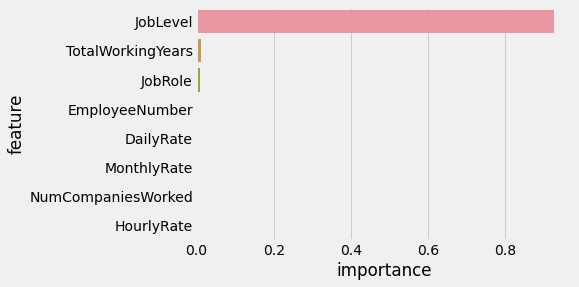

In [376]:
sns.barplot(data=importances.sort_values("importance", ascending=False).head(8), x="importance", y="feature")

In [377]:
predForest = RandoForest.predict(X_test)


In [378]:
predForest.shape

(368,)

In [379]:
y_test

1456     5689
236      2707
70       5473
42       2293
454      4262
        ...  
702      7264
436      3408
1194    15972
1248     3445
9        5237
Name: MonthlyIncome, Length: 368, dtype: int64

In [380]:
X_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1456,35,0,1,1199,1,18,4,1,1,2049,...,3,80,2,10,2,3,10,2,0,2
236,33,1,2,465,1,2,2,1,1,328,...,1,80,0,13,3,3,9,7,1,7
70,59,0,1,1225,2,1,1,1,1,91,...,3,80,0,20,2,1,4,3,1,3
42,26,1,2,1357,1,25,0,1,1,55,...,0,80,0,1,2,1,1,0,0,1
454,29,0,2,232,1,19,0,5,1,611,...,2,80,2,8,2,3,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,30,0,2,231,2,8,2,4,1,982,...,1,80,1,10,2,3,8,4,7,7
436,33,1,2,587,1,10,1,3,1,584,...,1,80,3,8,2,0,4,3,1,3
1194,47,0,2,1225,2,2,4,1,1,1676,...,0,80,3,29,2,0,3,2,1,2
1248,27,0,2,1054,1,8,0,3,1,1751,...,0,80,0,6,5,1,6,2,1,4


## Decision Tree

In [381]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [382]:
tree_reg.predict(some_sample)

array([2073.])

In [383]:
predTree = tree_reg.predict(X_train)
predTree

array([ 6261., 14336.,  2889., ...,  2693.,  5940.,  6500.])

In [384]:
predTree.shape

(1102,)

# Evaluation

In [385]:
lin_mse_forest = mean_squared_error(y_test, predForest)
lin_rmse_forest = np.sqrt(lin_mse_forest)
lin_rmse_forest

1286.2699556604723

In [386]:
lin_mae_forest = mean_absolute_error(y_test, predForest)
lin_mae_forest

910.3911645962733

In [387]:
lin_mse_lin_reg = mean_squared_error(y_test, predLinReg) 
lin_rmse_lin_reg = np.sqrt(lin_mse_lin_reg)
lin_rmse_lin_reg

1491.4575667395186

In [388]:
lin_mae_lin_reg = mean_absolute_error(y_test, predLinReg)
lin_mae_lin_reg

1137.9156617507294

https://www.kaggle.com/stpeteishii/importance-factor-for-job-satisfaction

# Fine Tune the Model

In [389]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandoForest, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [390]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [313]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,100], 'max_features': [2, 4, 6, 8,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [314]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 100}

In [315]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, random_state=42)

In [316]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2275.871302610794 {'max_features': 2, 'n_estimators': 3}
2251.74005909226 {'max_features': 2, 'n_estimators': 10}
2180.655037145697 {'max_features': 2, 'n_estimators': 30}
2154.5083236753276 {'max_features': 2, 'n_estimators': 100}
2154.4387601987187 {'max_features': 4, 'n_estimators': 3}
1811.3925908636895 {'max_features': 4, 'n_estimators': 10}
1672.2453741002332 {'max_features': 4, 'n_estimators': 30}
1625.3665203728406 {'max_features': 4, 'n_estimators': 100}
1819.4668494809077 {'max_features': 6, 'n_estimators': 3}
1592.301687836472 {'max_features': 6, 'n_estimators': 10}
1523.083240804559 {'max_features': 6, 'n_estimators': 30}
1461.2773039830938 {'max_features': 6, 'n_estimators': 100}
1695.3125161407072 {'max_features': 8, 'n_estimators': 3}
1454.964413585531 {'max_features': 8, 'n_estimators': 10}
1375.1283713916803 {'max_features': 8, 'n_estimators': 30}
1328.8773905222995 {'max_features': 8, 'n_estimators': 100}
1529.7788838657834 {'max_features': 10, 'n_estimators': 3}
1287

In [317]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025574,0.013903,0.007466,0.005435,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5.770187e+06,-4.575296e+06,...,-5.179590e+06,6.048908e+05,25,-1.719051e+06,-1.122765e+06,-1.482419e+06,-1.873882e+06,-2.118459e+06,-1.663315e+06,340446.254984
1,0.027387,0.002378,0.004487,0.000163,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-5.399335e+06,-4.459195e+06,...,-5.070333e+06,5.779006e+05,24,-1.120519e+06,-1.015034e+06,-8.521761e+05,-1.153630e+06,-1.212397e+06,-1.070751e+06,126719.186637
2,0.070242,0.002603,0.007416,0.000728,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-4.615923e+06,-4.326609e+06,...,-4.755256e+06,6.115226e+05,22,-7.145535e+05,-8.128506e+05,-7.713724e+05,-7.841291e+05,-7.874235e+05,-7.740658e+05,32658.631112
3,0.259410,0.052410,0.018457,0.002139,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",-4.371381e+06,-4.028605e+06,...,-4.641906e+06,7.700054e+05,21,-6.005557e+05,-6.427593e+05,-6.464637e+05,-7.170441e+05,-6.704267e+05,-6.554499e+05,38140.070107
4,0.013635,0.000588,0.003575,0.000320,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.555799e+06,-4.535416e+06,...,-4.641606e+06,1.023166e+06,20,-1.116521e+06,-1.482465e+06,-1.139262e+06,-1.659053e+06,-1.238159e+06,-1.327092e+06,210650.440386
5,0.031449,0.005190,0.004319,0.000297,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.718376e+06,-3.040990e+06,...,-3.281143e+06,4.873046e+05,15,-6.102252e+05,-6.550161e+05,-5.444388e+05,-7.909965e+05,-6.602909e+05,-6.521935e+05,80885.376828
6,0.080515,0.002225,0.007192,0.000640,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.554442e+06,-2.684991e+06,...,-2.796405e+06,2.269895e+05,12,-4.569064e+05,-4.676844e+05,-4.556306e+05,-4.895763e+05,-4.490240e+05,-4.637643e+05,14227.359739
7,0.255077,0.002534,0.015317,0.000157,4,100,NaN,"{'max_features': 4, 'n_estimators': 100}",-2.536135e+06,-2.469705e+06,...,-2.641816e+06,2.441342e+05,11,-3.740320e+05,-3.586558e+05,-4.061544e+05,-3.890657e+05,-3.772768e+05,-3.810369e+05,15871.204815
8,0.012081,0.000180,0.003615,0.000635,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.164034e+06,-3.390689e+06,...,-3.310460e+06,2.576630e+05,16,-7.840342e+05,-7.551066e+05,-9.113821e+05,-1.113806e+06,-7.046548e+05,-8.537968e+05,146813.347256
9,0.031420,0.000739,0.004119,0.000056,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.449756e+06,-2.413758e+06,...,-2.535425e+06,2.836609e+05,10,-4.769526e+05,-4.342906e+05,-4.506073e+05,-4.987181e+05,-4.253470e+05,-4.571831e+05,27191.288741


In [392]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a3e21e390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a3e21e748>},
                   random_state=42, scoring='neg_mean_squared_error')

In [395]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1346.574196941635 {'max_features': 7, 'n_estimators': 180}
1562.4697486622501 {'max_features': 5, 'n_estimators': 15}
1860.8016355178781 {'max_features': 3, 'n_estimators': 72}
1525.7404078118025 {'max_features': 5, 'n_estimators': 21}
1364.677931391157 {'max_features': 7, 'n_estimators': 122}
1861.969374048842 {'max_features': 3, 'n_estimators': 75}
1858.1614225284115 {'max_features': 3, 'n_estimators': 88}
1518.024730416378 {'max_features': 5, 'n_estimators': 100}
1834.1872233175345 {'max_features': 3, 'n_estimators': 150}
2205.444329287778 {'max_features': 5, 'n_estimators': 2}


In [396]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.37517578e-02, 1.75591232e-03, 1.62729884e-03, 7.54251836e-03,
       5.08309336e-03, 6.86124678e-03, 2.77425668e-03, 2.07027512e-03,
       0.00000000e+00, 6.72003873e-03, 2.21968880e-03, 1.28395958e-03,
       6.01302967e-03, 1.93653367e-03, 4.53999109e-01, 4.68881440e-02,
       1.88241476e-03, 1.50475342e-03, 6.42616760e-03, 8.91909717e-03,
       0.00000000e+00, 7.06654422e-04, 4.47208639e-03, 4.29918877e-04,
       2.67413479e-03, 0.00000000e+00, 2.05681755e-03, 2.89694082e-01,
       3.01207847e-03, 1.51113243e-03, 5.01425134e-02, 1.02315960e-02,
       8.05532907e-03, 7.75436097e-03])

In [397]:
attributes = X_train
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4539991088038352, 'JobLevel'),
 (0.28969408216435066, 'TotalWorkingYears'),
 (0.05375175779422266, 'Age'),
 (0.050142513417149565, 'YearsAtCompany'),
 (0.04688814404398145, 'JobRole'),
 (0.01023159595211519, 'YearsInCurrentRole'),
 (0.008919097166765354, 'NumCompaniesWorked'),
 (0.008055329068475968, 'YearsSinceLastPromotion'),
 (0.0077543609734879535, 'YearsWithCurrManager'),
 (0.007542518361226805, 'DailyRate'),
 (0.006861246776570803, 'DistanceFromHome'),
 (0.0067200387290655035, 'EmployeeNumber'),
 (0.006426167600594704, 'MonthlyRate'),
 (0.006013029673680866, 'HourlyRate'),
 (0.005083093356010847, 'Department'),
 (0.0044720863908919205, 'PercentSalaryHike'),
 (0.003012078468419591, 'TrainingTimesLastYear'),
 (0.0027742566792411747, 'Education'),
 (0.0026741347890808158, 'RelationshipSatisfaction'),
 (0.002219688799117914, 'EnvironmentSatisfaction'),
 (0.0020702751157260987, 'EducationField'),
 (0.002056817547162947, 'StockOptionLevel'),
 (0.0019365336730978986, 'JobInvolvement

In [398]:
final_model = grid_search.best_estimator_

In [399]:
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [401]:
lin_rmse_lin_reg

1491.4575667395186

In [402]:
lin_rmse_forest

1286.2699556604723

In [400]:
final_rmse

1272.33892665166

In [403]:
from scipy import stats

In [404]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([1133.92377656, 1397.10756834])

In [405]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(1133.923776556834, 1397.1075683372715)

In [406]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(1134.4079989120903, 1396.7144234060386)

## Context Manager Example

In [120]:
with open('sample.txt', 'w') as f:
        f.write("Hello, world.")
        


In [121]:
class Open_File():
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
    
    def __enter__(self):
        self.file = open(self.filename, self.mode)
        return self.file
    
    def __exit__(self, exc_type, exc_val, traceback):
        self.file.close()

In [122]:
with Open_File('sample.txt', 'w') as f:
    f.write('Testing')